### Name: APOORVA REDDY
### Role: Data Science Intern

# Importing Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import dataset

In [5]:
data = pd.read_csv('Iris.csv',index_col='Id')

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


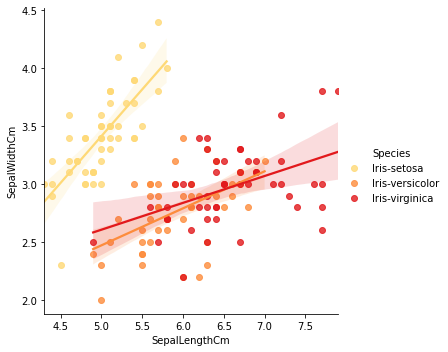

In [7]:
sns.lmplot('SepalLengthCm','SepalWidthCm',data=data,hue='Species',palette='YlOrRd')

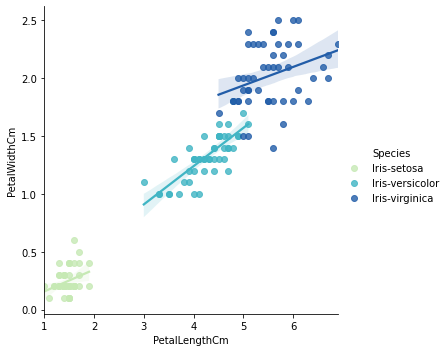

In [8]:
sns.lmplot('PetalLengthCm','PetalWidthCm',data=data,hue='Species',palette='YlGnBu')

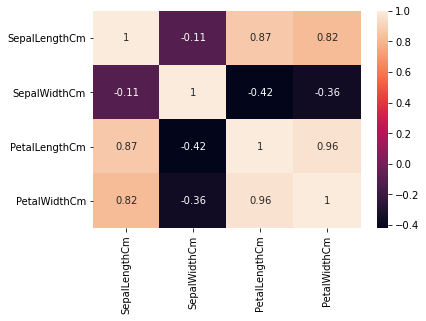

In [10]:
sns.heatmap(data.corr(),annot=True)

Text(0.5, 1.0, 'scatter')

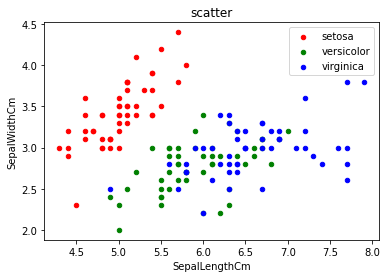

In [25]:
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")


In [44]:
print('The most probably iris plant with longest Sepal:{}'.format(data.iloc[132,-1]))
print('The most probably iris plant with widest Sepal:{}'.format(data.iloc[16,-1]))
print('The most probably iris plant with longest Petal:{}'.format(data.iloc[119,-1]))
print('The most probably iris plant with widest Petal:{}'.format(data.iloc[101,-1]))

The most probably iris plant with longest Sepal:Iris-virginica
The most probably iris plant with widest Sepal:Iris-setosa
The most probably iris plant with longest Petal:Iris-virginica
The most probably iris plant with widest Petal:Iris-virginica


# Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [84]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


In [85]:
le = LabelEncoder()
y = le.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.45,random_state=42)

In [111]:
dtc  = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [112]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cr = classification_report(y_test,y_pred,target_names=['Setosa','Versicolor','Virginica'])
cm = confusion_matrix(y_test,y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        27
  Versicolor       0.95      1.00      0.98        21
   Virginica       1.00      0.95      0.97        20

    accuracy                           0.99        68
   macro avg       0.98      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68

[[27  0  0]
 [ 0 21  0]
 [ 0  1 19]]
